In [1]:
import torch

def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

def compute_y(x1, x2):
   
    z1 = x1 + 2 * x2 + 1
    
    a1 = sigmoid(z1)
    
    z2 = x1 ** 2 + 2 * x2 + 1
    
    a2 = sigmoid(z2)
    
    z3 = 3 * a1 + a2 + 1
    
    y = sigmoid(z3)
    
    return y, z1, z2, a1, a2

x1 = torch.tensor(0.0, requires_grad=True)
x2 = torch.tensor(1.0, requires_grad=True)

y, z1, z2, a1, a2 = compute_y(x1, x2)

gradients = torch.autograd.grad(y, [x1, x2], create_graph=True)
dy_dx1, dy_dx2 = gradients
print(f"dy/dx1 = {dy_dx1.item()}")
print(f"dy/dx2 = {dy_dx2.item()}")

dy/dx1 = 0.0010861848713830113
dy/dx2 = 0.002896492835134268


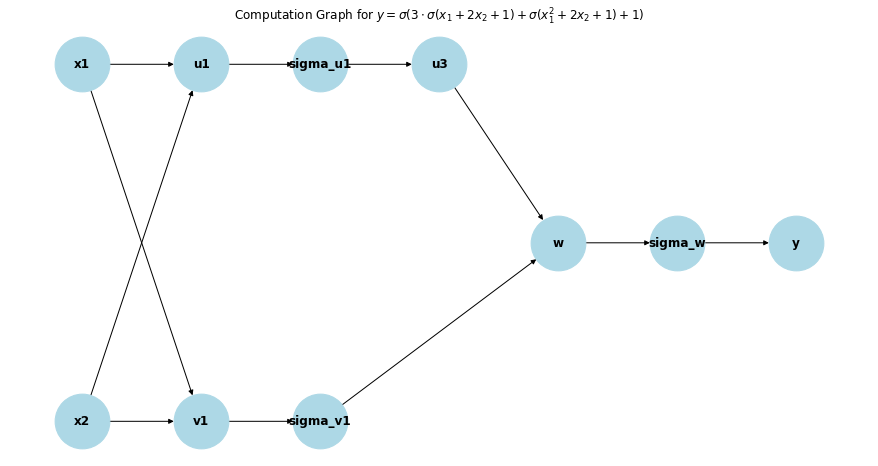

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as patches

G = nx.DiGraph()

pos = {
    'x1': (0, 2),
    'x2': (0, 0),
    'u1': (2, 2),
    'sigma_u1': (4, 2),
    'u3': (6, 2),
    'v1': (2, 0),
    'sigma_v1': (4, 0),
    'w': (8, 1),
    'sigma_w': (10, 1),
    'y': (12, 1)
}

nodes = ['x1', 'x2', 'u1', 'sigma_u1', 'u3', 'v1', 'sigma_v1', 'w', 'sigma_w', 'y']
G.add_nodes_from(nodes)

edges = [
    ('x1', 'u1'), ('x2', 'u1'), ('x1', 'v1'), ('x2', 'v1'),
    ('u1', 'sigma_u1'), ('sigma_u1', 'u3'), ('v1', 'sigma_v1'),
    ('u3', 'w'), ('sigma_v1', 'w'), ('w', 'sigma_w'), ('1', 'w'),  # 注意：'1' 是一个常数节点，但在图中我们省略它并用直接边表示
    ('sigma_w', 'y')
]

edges_to_add = [(u, v) for u, v in edges if u != '1' and v != '1']
G.add_edges_from(edges_to_add)

plt.figure(figsize=(12, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold', arrows=True)

plt.title('Computation Graph for $y = \\sigma(3 \\cdot \\sigma(x_1 + 2x_2 + 1) + \\sigma(x_1^2 + 2x_2 + 1) + 1)$')
plt.axis('off') 
plt.show()